# Perceptron Training Algorithm
***Author: Pratyush Bagaria (pbagar2@uic.edu)***

<br>

##### Step 1: Import required python libraries

In [17]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pylab as plt

##### Step 2: Assigning original weights

In [18]:
w0 = float("%.3f" % np.random.uniform(-0.25, 0.25))
w1 = float("%.3f" % np.random.uniform(-1, 1))
w2 = float("%.3f" % np.random.uniform(-1, 1))
org_weights = [w0, w1, w2]
print ('Original Weights = [w0, w1, w2] =', org_weights)

Original Weights = [w0, w1, w2] = [0.002, 0.558, 0.441]


##### Step 3: Generate Vectors S, S0 and S1
(Note: By default the number of input samples is 100. Change the upper limit of for-loop below to suit your necessity)

In [19]:
S = [] 
for i in range(0,100):
    S.append([float("%.3f" % random.uniform(-1,1)), float("%.2f" % random.uniform(-1,1))])
S0 = []
S1 = []
for i in S:
    if (1*w0)+(i[0]*w1)+(i[1]*w2) >= 0:
        S0.append([i[0]] + [i[1]] + [0])
    elif (i[0]*w1)+(i[1]*w2) < 0:
        S1.append([i[0]] + [i[1]] + [1])
samples = S0 + S1
print ("Total number of data samples:",len(S))
# print ("\nSamples in S0 Vector:\n")
# print (S0)
# print ("\n\nSamples in S1 Vector:\n")
# print (S1)

Total number of data samples: 100



##### Step 4: Generate Graph

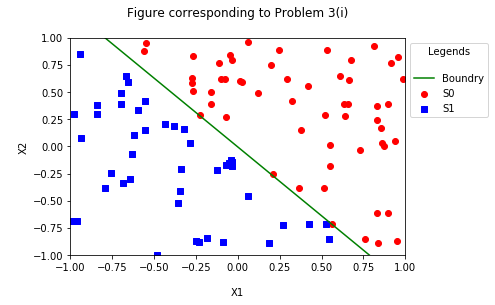

In [20]:
# Plotting data samples
s1x1 = []
s1x2 = []
s0x1 = []
s0x2 = []
for i in S0:
    s0x1.append(i[0])
    s0x2.append(i[1])
for i in S1:
    s1x1.append(i[0])
    s1x2.append(i[1])

plt.scatter(s0x1, s0x2, marker='o', c='r', label='S0')    
plt.scatter(s1x1, s1x2, marker='s', c='b', label='S1')

# Plotting decision boundary 
x2 = +1.0
x1 = -(w0+w2)/w1
x2prime = -1.0 
x1prime = -(w0-w2)/w1
p1 = np.array([x1prime,x1])
p2 = np.array([x2prime,x2])
plt.plot(p1, p2, c='g', label='Boundry')

# Updating labels, legends, etc.
plt.ylim([-1,1])
plt.xlim([-1,1])
plt.ylabel('\nX2')
plt.xlabel('\nX1')
plt.title('Figure corresponding to Problem 3(i)\n')
plt.legend(bbox_to_anchor=(1,1), loc="upper left", title = "Legends\n")
plt.show()

##### Step 5: Picking weights (w0', w1', w2') and finding total misclassifications

In [21]:
def totalMisclassified(samples, weights):
    count = 0
    for i in samples:
        x2 = func_u(weights[0]+(i[0]*weights[1])+(i[1]*weights[2]))
        if x2 != i[2]:
            count = count+1
    return count

def func_u(x1):
    if x1 >= 0:
        x2 = 1
    else:
        x2 = 0
    return x2

w0prime = float("%.3f" % np.random.uniform(-1, 1))
w1prime = float("%.3f" % np.random.uniform(-1, 1))
w2prime = float("%.3f" % np.random.uniform(-1, 1))

weights = []
weights = [w0prime, w1prime, w2prime]
totalMisclassifications = totalMisclassified(samples, weights)
print ('Total number of misclassifications:', totalMisclassifications)

Total number of misclassifications: 47


##### Step 6: Perceptron Training

In [22]:
def pta(weights):
    epochNumber = 0
    updated_weights = []
    misclassificationCount = []
    while (totalMisclassified(samples,weights)!=0):
        misclassificationCount.append(totalMisclassified(samples,weights))
        epochNumber = epochNumber + 1
        for i in range(len(samples)):
            #actual ouput
            x2 = func_u(weights[0] + (samples[i][0]*weights[1]) + (samples[i][1]*weights[2]))
            updated_input =[1]+samples[i][0:2]
            #desired output
            d = samples[i][2]
            difference = d-x2
            if difference != 0:
                updated_input[0]= updated_input[0]*eta*difference
                updated_input[1]= updated_input[1]*eta*difference
                updated_input[2]= updated_input[2]*eta*difference
                weights[0] = round (weights[0]+updated_input[0], 3)
                weights[1] = round (weights[1]+updated_input[1], 3)
                weights[2] = round (weights[2]+updated_input[2], 3)
        updated_weights.append(weights)
    final_misclassification = totalMisclassified(samples,weights)
    print ('Final Weights =', updated_weights[-1])
    return updated_weights, misclassificationCount

##### Step 7: Analyzing when training parameter (eta) = 1

Initial Weights = [-0.543, 0.379, 0.258]
Final Weights = [-0.543, -5.857, -5.172]


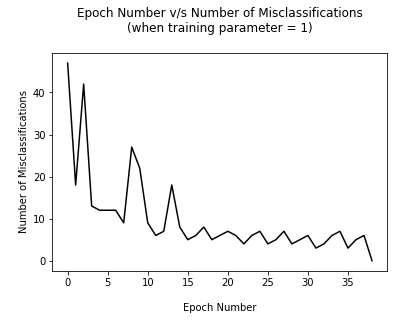

In [23]:
weights_prime = [w0prime, w1prime, w2prime]
print ('Initial Weights =' , weights_prime)
eta = 1
weights_dprime=[]
weights_dprime, misclassificationCount = pta(weights_prime)
epochRange = range(len(weights_dprime)+1)
misclassificationRange = misclassificationCount+[0]
plt.plot(epochRange, misclassificationRange, c = 'black')
plt.title('Epoch Number v/s Number of Misclassifications\n(when training parameter = 1)\n')
plt.ylabel('\nNumber of Misclassifications')
plt.xlabel('\nEpoch Number\n')
plt.show()

##### Step 8: Analyzing when training parameter (eta) = 10

Initial Weights = [-0.543, 0.379, 0.258]
Final Weights = [-0.543, -49.081, -38.842]


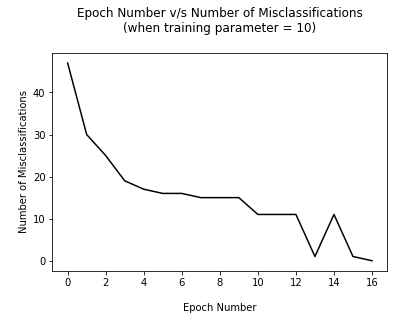

In [24]:
weights_prime = [w0prime, w1prime, w2prime]
print ('Initial Weights =' , weights_prime)
eta = 10
weights_dprime=[]
weights_dprime, misclassificationCount = pta(weights_prime)
epochRange = range(len(weights_dprime)+1)
misclassificationRange = misclassificationCount+[0]
plt.plot(epochRange, misclassificationRange, c = 'black')
plt.title('Epoch Number v/s Number of Misclassifications\n(when training parameter = 10)\n')
plt.ylabel('\nNumber of Misclassifications')
plt.xlabel('\nEpoch Number\n')
plt.show()

### Step 9: Analyzing when training parameter (eta) = 0.1

Initial Weights = [-0.543, 0.379, 0.258]
Final Weights = [-0.043, -0.526, -0.47]


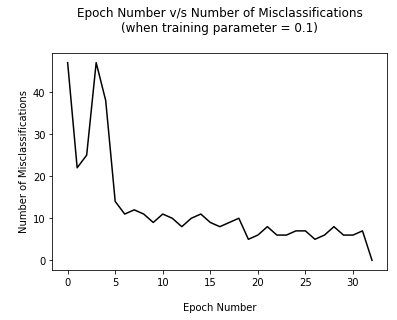

In [25]:
weights_prime = [w0prime, w1prime, w2prime]
print ('Initial Weights =' , weights_prime)
eta = 0.1
weights_dprime=[]
weights_dprime, misclassificationCount = pta(weights_prime)
epochRange = range(len(weights_dprime)+1)
misclassificationRange = misclassificationCount+[0]
plt.plot(epochRange, misclassificationRange, c = 'black')
plt.title('Epoch Number v/s Number of Misclassifications\n(when training parameter = 0.1)\n')
plt.ylabel('\nNumber of Misclassifications')
plt.xlabel('\nEpoch Number')
plt.show()

### Observations:

1. Smaller the value of training parameter is, the slower we move towards the converging point thereby ensuring a better and less noisy results without missing out potential points of convergence.
2. As the value of training parameter increases the number of epochs required to converge increases. So, for a very high value of training parameter there are chances of failing to achieve convergence, though the number of epochs will be less in this scenario and training will end early when compared with a comparatively lower value of training parameter.
3. If we would have satrted with different weights and sample vectors 'S' then the effect of training parameter on the performance would be more or less the same.
4. The number of epochs increased significantly when the size of the data samples is increased from 100 to 1000.